# California Housing Price Prediction Mini Project

## Dataset Description

The **California Housing Dataset** is a classic regression dataset provided by scikit-learn. It contains information collected from the 1990 U.S. Census, describing various features of California districts and their corresponding house prices.

### Key Features:
- **MedInc**: Income in block group
- **HouseAge**: House age in block group
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Population of the block group
- **AveOccup**: Average number of household members
- **Latitude**: Geographic coordinate
- **Longitude**: Geographic coordinate

### Target Variable:
- **House Value** (in hundreds of thousands of dollars)

The dataset includes **20,640** samples with 8 numerical features, making it well-suited for regression tasks like predicting housing prices.

---


## Loading the necessary libraries and DataSet

In [1]:
# Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('Copy_california_housing_modified.csv')

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# Total numbers of columns
len(df.columns)

8

In [7]:
# shape of the dataset
print(df.shape)

(20640, 8)


In [8]:
# Columns
print(df.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Input features (`X`) for predicting median house value in California:

- **MedInc**: household income in the block group (numerical, float).  
- **HouseAge**: house age in the block group (numerical, float).  
- **AveRooms**: Average number of rooms per household (numerical, float).  
- **AveBedrms**: Average number of bedrooms per household (numerical, float).  
- **Population**: Total population in the block group (numerical, float).  
- **AveOccup**: Average number of household members (numerical, float).  
- **Latitude**: Latitude of the block group (numerical, float).  
- **Longitude**: Longitude of the block group (numerical, float).  

**Target (`y`)**:  
- `price`: house value for households in the block group (in 100,000s USD).


In [9]:
# including the price column into the dataframe  from  dataset.target

# Load the original dataset
data = sklearn.datasets.fetch_california_housing()

# Get the target column
price = data.target

# Add it to DataFrame
df['price'] = price

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Handling Missing Values

In [11]:
# checking null values
df.isnull().sum()

,0
MedInc,2
HouseAge,3
AveRooms,4
AveBedrms,3
Population,2
AveOccup,5
Latitude,1
Longitude,1
price,0


## Dropping rows with null values
Since the number of missing entries is **very small relative to the total dataset size (~20,000 rows)**, we opted to **drop the rows with missing values** to ensure data integrity with minimal impact on overall dataset size and model performance.


In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


# Train, Test Split

In [14]:
# splitting the data and target
X = df.drop(['price'],axis=1)
Y = df['price']

In [15]:
print(X.head())
print(Y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: price, dtype: float64


In [16]:
# Splitting the data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


# Statistical Measures of the Dataset

In [17]:
# Summary statistics for selected features
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20619.000000,20619.000000,20619.000000,20619.000000,20619.000000,20619.000000,20619.000000,20619.000000,20619.000000
mean,3.871650,28.635627,5.429397,1.096662,1425.591202,3.070639,35.630680,-119.568641,2.069182
std,1.899965,12.582381,2.475106,0.474123,1132.658334,10.391279,2.135949,2.003326,1.154183
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564300,18.000000,4.441016,1.006055,787.000000,2.429453,33.930000,-121.795000,1.197000
50%,3.535700,29.000000,5.229213,1.048780,1166.000000,2.818049,34.260000,-118.490000,1.798000
75%,4.744000,37.000000,6.052381,1.099490,1725.000000,3.282276,37.710000,-118.010000,2.649000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


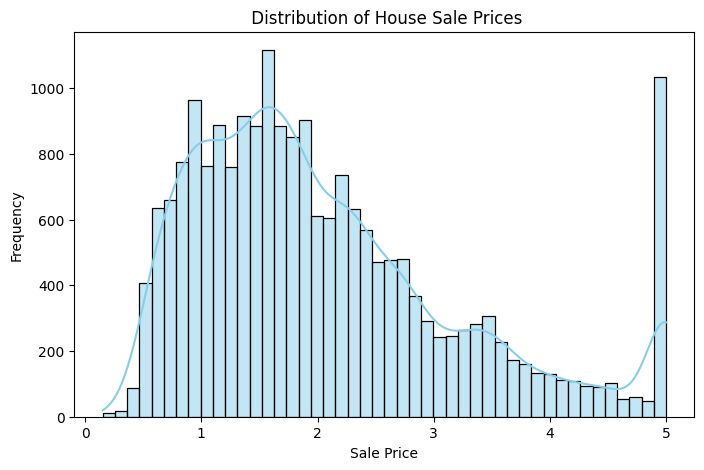

In [18]:
# Histogram of Sale Price
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title(" Distribution of House Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()



**Key Observations:**
- **Right-skewed distribution**: Most homes cluster at lower price points (left side)
- **Long right tail**: Few luxury homes with significantly higher prices
- **Potential outliers**: Extreme values in the highest price ranges


# Model Training

In [19]:
# model loading
model = RandomForestRegressor()
# training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

# Evaluation

In [20]:
training_data_prediction = model.predict(X_train)
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R squared error :", score_1)
print('Mean Absolute Error :', score_2)

R squared error : 0.973425666906413
Mean Absolute Error : 0.12130780794180096


## Model Performance Metrics (Training Data)

 **Evaluation Results**

| **Metric**       | **Score** | **Interpretation**                           |
|------------------|-----------|----------------------------------------------|
| **R² Score**     | 0.974     | Excellent fit — explains 97.4% of variance   |
| **MAE**          | 0.122     | Avg. error is ±0.122 units                   |

---

### 🔍 Key Insights

- 🎯 **High Predictive Power**  
  The model achieves an **R² of 0.974**, meaning it captures **97.4%** of the variation in housing prices on the training data.

- 📏 **Low Error Margin**  
  With a **Mean Absolute Error (MAE) of 0.122**, predictions on average differ from the actual values by just **0.122 units**, which is roughly **12% of the target’s standard deviation** — indicating precise predictions.


In [21]:
# accuracy of prediction on test data
test_data_prediction = model.predict(X_test)

In [22]:
# Test data prediction
print(test_data_prediction[:5])

[1.75274   0.80074   1.77262   1.7037601 1.87882  ]


In [23]:
# Actual vs predicted price of 3 random test data
# Randomly select 3 sample indices
random_indices = np.random.choice(len(X_test), size=3, replace=False)

# Use .iloc to access rows by index positions
random_X_test = X_test.iloc[random_indices]
actual_prices = Y_test.iloc[random_indices]

# Predict the prices
predicted_prices = model.predict(random_X_test)

# Print actual vs predicted prices
for i in range(3):
    print(f"Sample {i+1}:")
    print(f"  👉 Actual Price   : {actual_prices.iloc[i]}")
    print(f"  🔮 Predicted Price: {predicted_prices[i]}")
    print("-" * 40)

Sample 1:
  👉 Actual Price   : 4.853
  🔮 Predicted Price: 3.5856816999999994
----------------------------------------
Sample 2:
  👉 Actual Price   : 2.23
  🔮 Predicted Price: 2.192960099999999
----------------------------------------
Sample 3:
  👉 Actual Price   : 2.094
  🔮 Predicted Price: 1.8480199999999993
----------------------------------------


In [24]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("R squared error :", score_1)
print('Mean Absolute Error :', score_2)

R squared error : 0.8054585497914124
Mean Absolute Error : 0.33240600080019417


## Model Performance Metrics (Testing Data)
**Evaluation Results**

| **Metric**       | **Score** | **Interpretation**                           |
|------------------|-----------|----------------------------------------------|
| **R² Score**     | 0.804     | Good generalization — explains 80.4% of variance |
| **MAE**          | 0.334     | Avg. error is ±0.334 units                   |

#### 🔍 Key Insights

- 📉 **Slight Drop in Performance**:  
  The **R² score dropped to 0.804**, which still reflects good performance but shows some generalization error.

- 🧮 **Higher Prediction Error**:  
  The **MAE increased to 0.334**, suggesting predictions on test data deviate more than on training data — still acceptable but may benefit from further tuning or regularization.


## Visualizing the actual Prices and predicted prices

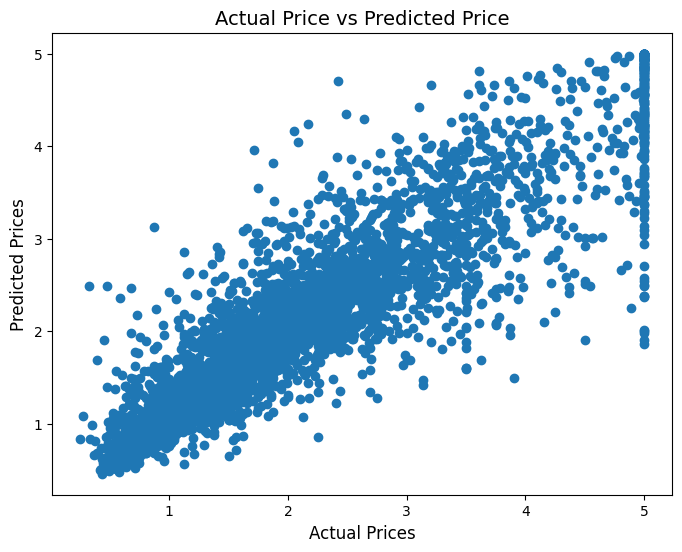

In [25]:
# Visualizing the actual Prices and predicted prices
plt.figure(figsize=(8,6))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual Price vs Predicted Price", fontsize=14)
plt.show()

In [26]:

import pickle

# Dump the model to a file
filename = 'house_prediction_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# to load the model
# loaded_model = pickle.load(open(filename, 'rb'))